# Desafío N°2. Grupo N°3

### 1. Preparación Inicial Dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import shapely.wkt 

In [2]:
df = pd.read_csv('properatti.csv',sep=',')

In [3]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

### 2) Completar datos Localidades.

In [5]:
cant_pat = df['place_with_parent_names'].str.count('\|')
div = df['place_with_parent_names'].str.split(pat="|", expand=True)
div.columns = ['_index','_pais','_estado','_partido','_localidad','_bcerrado','_col']
div.sample(5)

,_index,_pais,_estado,_partido,_localidad,_bcerrado,_col
90627,,Argentina,Córdoba,Córdoba,,None,None
16202,,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,Ramos Mejía,,None
90019,,Argentina,Capital Federal,Palermo,Palermo Soho,,None
73910,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,Manuel B Gonnet,,None
53846,,Argentina,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,Monte Grande,,None


In [6]:
div_partido = div._partido.replace({'': np.nan}, inplace=True)

In [7]:
div_localidad = div._localidad.replace({'': np.nan}, inplace=True)

In [8]:
div_bcerrado = div._bcerrado.replace({'': np.nan}, inplace=True)

Concatenamos el dataframe div a df y elminamos la columna _index generada en el split.

In [9]:
df = pd.concat([df, div], axis=1)
df.drop(['_index'],axis=1,inplace=True)

Analizamos la Columna '_col' del Split que tipo de datos contiene. Aplicamos un unique para verificar los datos.

In [10]:
df['_col'].unique()

array([None, ''], dtype=object)

La columna '_col' sólo tiene datos tipo None y espacio blanco. La podemos eliminar

In [11]:
df.drop(['_col'],axis=1,inplace=True)

Analizamos los datos faltantes en la columnas 'place_name'. Observamos a partir de la columna '_partido' que corresponden todos a la localidad de Tigre.

In [12]:
df.loc[df['place_name'].isnull(),['_partido','_localidad']]

,_partido,_localidad
6489,Tigre,NaN
10201,Tigre,NaN
11451,Tigre,NaN
14839,Tigre,NaN
18622,Tigre,NaN
21922,Tigre,NaN
23664,Tigre,NaN
24722,Tigre,NaN
38856,Tigre,NaN
45970,Tigre,NaN


In [13]:
df.loc[(df['place_name'].isnull()),'place_name'] = df.loc[df['place_name'].isnull(),'_partido']

Analizamos los datos obtenidos de la columna 'place_with_parent_names' y la comparamos con las columnas 'place_name', 'country_name' y 'state_name'. Vamos a eliminar las columnas identicas y nos quedamos con columnas con datos adicionales.

In [14]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
_pais                              0
_

Verificamos datos con formatos incorrectos.

In [15]:
df.loc[df['place_name'].str.extract('(\w{2}\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,_pais,_estado,_partido,_localidad,_bcerrado
7367,7367,sell,house,coordenadas 34.255511,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|coor...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4284852743,-58.6017169869",-34.428485,...,NaN,http://www.properati.com.ar/15xo4_venta_casa_c...,PLANTA BAJA: Hall y toilette de recepción. Liv...,Hermosa casa sobre la laguna en Los Ombues,https://thumbs4.properati.com/6/RN1XpmMmqDz7b6...,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,coordenadas 34.255511,NaN


In [16]:
df.loc[7367,'place_name'] = df.loc[7367,'_partido']

In [17]:
df.loc[df['place_name'].str.extract('(\w{2}\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,_pais,_estado,_partido,_localidad,_bcerrado


In [18]:
df['place_name'].isnull().sum()

0

In [19]:
(df['state_name']!=df['_estado']).sum()

0

Observamos que las primeras las columnas '_pais' y '_estado' son identicas a 'country_name' y 'state_name' respectivamente. Dado que no aportan datos adicionales procedemos a eliminarlas.

In [20]:
df.drop(['_pais'],axis=1,inplace=True)

In [21]:
df.drop(['_estado'],axis=1,inplace=True)

Analizamos si podemos obtener mayor información respecto a las nuevas columnas '_partido', '_localidad' y 'b_cerrado'. Se observa que en la columna  '_localidad' se encuentran nombres de Barrios Cerrados y Countries. En la columna '_partido' hace referencia a Barrio Norte siendo la misma una localidad de Capital Federal.

In [22]:
df_bcerrado = df._bcerrado.replace({None: np.nan}, inplace=True)

In [23]:
df['_bcerrado'].unique()

array([nan, 'Barrio El Golf', 'Barrio Las Glorietas', 'Barrio Los Lagos',
       'Enyoi', 'QBay Yacht', 'Barrio La Alameda', 'Islas del Canal',
       'Barrio Los Alisos', 'BarrioPortezuelo', 'Barrio La Isla',
       'Barrio Los Tilos', 'Barrio Los Sauces', 'Barrio Cabos del Lago',
       'Barrio Los Castores', 'Barrio Barrancas del Lago',
       'Barrio El Yacht'], dtype=object)

In [24]:
pattern_b = r'(barrio|altos|estancias|country|haras|fincas|acacias)'

In [25]:
reg_b = re.compile(pattern_b, flags = re.IGNORECASE)

In [26]:
df['_localidad'].str.extract(reg_b).notnull().sum()

0    1768
dtype: int64

En la columna _localidad podemos extraer el nombre de 1734 barrios cerrados y country a los que pertenecen las propiedades.

In [27]:
df.loc[df['_localidad'].str.extract(reg_b, expand=False).notnull(),'_localidad']

26                           Barrio San Gabriel
27                          Estancias del Pilar
61                             Fincas de Iraola
202                         Estancias del Pilar
257                   Country Maschwitz Privado
286          Barrio Cerrado Fincas de Maschwitz
489                        Mapuche Country Club
566                Santa Barbara Barrio Cerrado
593                Santa Barbara Barrio Cerrado
601                Santa Barbara Barrio Cerrado
604                Santa Barbara Barrio Cerrado
611                           Barrio San Matías
763                        Haras María Victoria
881                   Country San Jorge Village
939                  Highland Park Country Club
961                   Los Lagartos Country Club
1002      Barrio Cerrado "La Cautiva del Pilar"
1003               Santa Barbara Barrio Cerrado
1186                             Barrio Acacias
1367               Santa Barbara Barrio Cerrado
1692                 Los Pingüinos Count

In [28]:
df['_partido'].str.extract(reg_b, expand = False).notnull().sum()

1141

Vamos a verificar el nombre de los posibles Barrios Cerrados en la columna "_partido". 
- Observamos que sólo corresponden a una localidad de Capital Federal llamada BArrio Norte. No corresponde mover las mismas a la columna _bcerrado 

In [29]:
df.loc[df['_partido'].str.extract(reg_b, expand = False).notnull(),'_partido'].sample()

49646    Barrio Norte
Name: _partido, dtype: object

In [30]:
df['_bcerrado'].isnull().sum()

120672

In [31]:
df.loc[(df['_localidad'].str.extract(reg_b, expand=False).notnull()),'_bcerrado']= df.loc[(df['_localidad'].str.extract(reg_b, expand=False).notnull()),'_localidad']

In [32]:
df['_bcerrado'].isnull().sum()

118904

In [33]:
df.loc[df['place_name'].str.extract('(\d+)', expand=False).notnull(),:]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_partido,_localidad,_bcerrado
4303,4303,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4440943219,-58.6433234132",-34.444094,...,NaN,NaN,NaN,http://www.properati.com.ar/15mfr_venta_casa_t...,Hermosa propiedad en Venta ubicada en uno de l...,Venta Casa Country Talar del Lago I Tigre Pach...,https://thumbs4.properati.com/1/Vt4dYTa5o3qM0y...,Tigre,Talar del Lago 1,NaN
6500,6500,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,NaN,NaN,NaN,http://www.properati.com.ar/15ujf_venta_casa_t...,Excelente casa en lote interno del barrio con ...,CASA MODERNA EN VENTA - TALAR DEL LAGO 2,https://thumbs4.properati.com/9/0OyIWMKMK1auvQ...,Tigre,Talar del Lago 1,NaN
7176,7176,sell,house,Talar del lago 2,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4407925861,-58.6530945362",-34.440793,...,NaN,NaN,NaN,http://www.properati.com.ar/15wzn_venta_casa_t...,Orúe-HerreraVegas PropiedadesExcelente casa en...,Excelente casa a estrenar en Talar del Lago 2,https://thumbs4.properati.com/0/l7SnHhrF17-4-M...,Tigre,Talar del lago 2,NaN
9283,9283,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4141572646,-58.8404369254",-34.414157,...,NaN,NaN,NaN,http://www.properati.com.ar/163md_venta_casa_h...,"HALL DE ENTRADA, AMPLIO LIVING COMEDOR, BAÑO C...",PROPIEDAD SOBRE LOTE CENTRAL,https://thumbs4.properati.com/7/QTCbZ4_hwE7TSS...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
10061,10061,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,NaN,NaN,NaN,http://www.properati.com.ar/166ca_venta_casa_t...,"Casa desarrollada en dos plantas, estilo Franc...","Excelente casa en Talar del Lago 2, estilo Fra...",https://thumbs4.properati.com/3/KMvVeB_VGarjdy...,Tigre,Talar del Lago 1,NaN
10065,10065,sell,house,Talar del Lago 1,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tala...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4445544084,-58.6430873788",-34.444554,...,NaN,NaN,NaN,http://www.properati.com.ar/166d3_venta_casa_t...,Muy buena casa!En Planta Baja:Hall de recepció...,CASA EN VENTA EN TALAR DEL LAGO 1,https://thumbs4.properati.com/4/dypTJqiPYrrLyl...,Tigre,Talar del Lago 1,NaN
14249,14249,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.413403,-58.840163",-34.413403,...,NaN,5.0,NaN,http://www.properati.com.ar/16rnz_venta_casa_h...,Corredor Responsable: Lucrecia Saulle - CSI 55...,Casa a la venta en La Pradera .-Pilar,https://thumbs4.properati.com/8/m99Qu9vZVIOH3D...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
14403,14403,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4115054402,-58.8433935349",-34.411505,...,NaN,NaN,NaN,http://www.properati.com.ar/16s7j_venta_casa_p...,Imponente propiedad en barrio La Pradera. Casa...,Barrio Cerrado La Pradera - Pilar - Bs.As. G.B...,https://thumbs4.properati.com/2/s6PobpfOzDehJI...,Pilar,Haras del Pilar - Las Praderas 1 y 2,Haras del Pilar - Las Praderas 1 y 2
14422,14422,sell,house,Haras del Pilar - Las Praderas 1 y 2,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Hara...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4160795942,-58.8401985168",-34.416080,...,NaN,NaN,NaN,http://www.properati.com.ar/16s8k_venta_casa_h...,Excelente casa moderna con mucho diseño constr...,Barrio Cerrado La

In [34]:
pattern_c = r'(altos|country|haras|fincas|barrio|estancias|lago|club|Rincón de Maschwitz|acacias)'

In [35]:
reg_c = re.compile(pattern_c, flags = re.IGNORECASE)

In [36]:
df['place_name'].str.extract(reg_c).notnull().sum()

0    3712
dtype: int64

Registramos los nombres de barrios cerrados indicados en la variables place_name. Luego completamos la variable place_name con el dato de _partido.

In [37]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'_bcerrado']= df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name']

In [38]:
df['_bcerrado'].notnull().sum()

3748

In [39]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name'] = df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'_partido']

Verificamos:

In [40]:
df.loc[(df['place_name'].str.extract(reg_c, expand=False).notnull()),'place_name'].unique()

array(['Barrio Norte', 'Villa Santa Cruz del Lago', 'General Lagos',
       'Cinco Saltos', 'Lago Epuyén'], dtype=object)

Procedemos a eliminar las columnas _partido y _localidad.

In [41]:
df.drop(['_localidad'],axis=1,inplace=True)
df.drop(['_partido'],axis=1,inplace=True)

In [42]:
df.drop(['place_with_parent_names'], axis=1, inplace=True)

In [43]:
df.loc[55272,'rooms'] = 3

In [44]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                         0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
_bcerrado                     117472
dtype: int64

In [45]:
pattern_d = r'(Bs)'

In [46]:
reg_d = re.compile(pattern_d, flags = re.IGNORECASE)

In [47]:
df['place_name'].str.extract(reg_d).notnull().sum()

0    311
dtype: int64

In [48]:
df.drop(df['place_name'].str.extract(reg_d).notnull(), inplace=True)

In [49]:
df.shape

(121219, 26)

### 3. Completar y Filtrar Outliers por precios.

#### 3.1. Standarizar moneda a USD

In [50]:
# busco para la moneda USD, inconsistencias entre el precio y precio aproximado en USD
df.loc[(df['currency'] == 'USD') & (df['price'] != df['price_aprox_usd'])  ]

# no hay casos de diferencia

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_bcerrado


Calculo el precio del USD, basado en casas expresadas en USD

In [51]:
serie_local = df.loc[(df['currency'] == 'USD')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'USD')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


Calculo el precio del USD, basado en casas expresadas en ARS

In [52]:
serie_local = df.loc[(df['currency'] == 'ARS')]['price_aprox_local_currency'] # / ['price']
serie_precio = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd']

x = serie_local / serie_precio

usd_rate = round(x.mean(),4)
print(usd_rate)

17.6445


Se expresarán todos los precios a USD, eliminando la moneda ARS

In [53]:
def roundBy(x, base=50):
    return int(base * round(float(x)/base))

In [54]:
df.loc[(df['currency'] == 'ARS'),'price'] = df.loc[(df['currency'] == 'ARS')]['price_aprox_usd'].apply(roundBy)

In [55]:
# llevo todas los precios a USD
df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()),'price_per_m2'] = df['price_per_m2']/usd_rate

In [56]:
## Moneda ARS, ya convertido en pasos anteriores a USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'ARS') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'ARS'),'price_usd_per_m2'] = aux_redondeo


## Moneda USD

# Redondear en múltiplos base 10 - precio por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_per_m2'].notnull()) ,'price_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_per_m2'] = aux_redondeo

# Redondear en múltiplos base 10 - precio USD por m2
aux_redondeo = df.loc[(df['currency'] == 'USD') & (df['price_usd_per_m2'].notnull()) ,'price_usd_per_m2' ].apply(lambda r: roundBy(r,10))
df.loc[(df['currency'] == 'USD'),'price_usd_per_m2'] = aux_redondeo

#### 3.2. Se completarán datos de Precios.

In [57]:
pattern = r'([Uu][$][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [58]:
array_precios = df.loc[ (df['price'].isnull()),'title'].apply(regex.findall)

In [59]:
def retValue(s):    
    r = s.copy()
    for i in s.index:
        flag = True
        for idx, val in enumerate(s[i]):
            r[i] = float(val[1])*1000
            flag = False
        if flag:
            r[i] = np.nan
    return r

In [60]:
array_precios = retValue(array_precios)

In [61]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [62]:
#obtengo precios de propiedades utilizando 'USD XXX.XXXX' en el patrón a buscar
pattern = r'([Uu][Ss][Dd][\s])(\d{1,3}[.]\d{3,3})'
regex = re.compile(pattern)

In [63]:
array_precios = df.loc[ (df['price'].isnull()),'description'].apply(regex.findall)

In [64]:
array_precios = retValue(array_precios)

In [65]:
 df.loc[ (df['price'].isnull()),'price'] = array_precios

In [66]:
# Selecciono los casos de PRECIO existente, PRECIO x M2 sin datos, SUPERFICIE CUBIERTA con datos y mayor a cero (0), y 
# SUPERFICIE TOTAL mayor o igual a SUPERFICIE CUBIERTA
# Resultado son 2031 casos que se puede actualizar

df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']) ]

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,_bcerrado
1666,1666,sell,house,Ituzaingó,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.66341019,-58.67405701",-34.663410,-58.674057,...,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15j8w_venta_casa_i...,CONSULTE POR EL CÓDIGO:1834(2)DUPLEX A ESTRENA...,U$D 115.000 - Tipo casa PH en Venta -,https://thumbs4.properati.com/4/uWjbZ69MtmAB81...,NaN
1667,1667,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8x_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/0/B5XXxSBOmFrPd9...,NaN
1668,1668,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8y_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/1/xyHZp-kLegQMHO...,NaN
1669,1669,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j8z_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/7/P1fnUddau9ItxR...,NaN
1670,1670,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j90_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/3/S7E92ARTrGAxe4...,NaN
1671,1671,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j91_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/5/LPErF579G9cVxQ...,NaN
1672,1672,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j92_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/5/S3_5VKYGHqhuZu...,NaN
1673,1673,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j93_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/7/gS5ssLHlmIRvka...,NaN
1674,1674,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j94_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/3/T0Cs38C0nSSl2l...,NaN
1675,1675,sell,house,Nordelta,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.42100525,-58.63066101",-34.421005,-58.630661,...,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/15j95_venta_casa_n...,REALIZA UN TOUR VIRTUAL EN 3D COPIANDO EL SIGU...,U$D 740.000 - Casa en Venta - El Golf,https://thumbs4.properati.com/6/_jcUbLv-Zt-zba...,NaN


In [67]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 CUBIERTA para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_scxm2 = df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull()) & (df['surface_covered_in_m2'].notnull()) & (df['surface_covered_in_m2'] > 0)& (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_covered_in_m2' ]
a_pcxm2 = a_price / a_scxm2

In [68]:
# Aplico el Precio por m2 CUBIERTO al dataset
df.loc[(df['price'].notnull()) & (df['price_per_m2'].isnull())  & (df['surface_covered_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_per_m2' ]= a_pcxm2

In [69]:
#Extraigo el precio de los casos anteriores y la cantidad de m2 TOTAL para calcular precio por m2
a_price = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price' ]
a_stxm2 = df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull()) & (df['surface_total_in_m2'].notnull()) & (df['surface_total_in_m2'] > 0) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'surface_total_in_m2' ]
a_ptxm2 = a_price / a_stxm2

In [70]:
# Aplico el Precio por m2 TOTAL al dataset
df.loc[(df['price'].notnull()) & (df['price_usd_per_m2'].isnull())  & (df['surface_total_in_m2'] > 0) & (df['surface_covered_in_m2'].notnull()) & (df['surface_total_in_m2'] >= df['surface_covered_in_m2']),'price_usd_per_m2' ]= a_ptxm2

En la consulta siguiente tenemos 89.689 registros con precio y precio por m2

In [71]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull())].count()

Unnamed: 0                    89688
operation                     89688
property_type                 89688
place_name                    89688
country_name                  89688
state_name                    89688
geonames_id                   73847
lat-lon                       53067
lat                           53067
lon                           53067
price                         89688
currency                      87657
price_aprox_local_currency    87657
price_aprox_usd               87657
surface_total_in_m2           65380
surface_covered_in_m2         89688
price_usd_per_m2              65380
price_per_m2                  89688
floor                          6524
rooms                         38057
expenses                      12073
properati_url                 89688
description                   89687
title                         89688
image_thumbnail               88046
_bcerrado                      3340
dtype: int64

En la consulta siguiente consultamos propiedades con PRECIO, PRECIO x M2 (solo metros cubiertos) y PRECIO USD X M2 (incluye los metros totales), hay un total de 65.381 registros

In [72]:
df.loc[ (df['price'].notnull()) & (df['price_per_m2'].notnull()) & (df['price_usd_per_m2'].notnull())].count()

Unnamed: 0                    65380
operation                     65380
property_type                 65380
place_name                    65380
country_name                  65380
state_name                    65380
geonames_id                   53646
lat-lon                       38967
lat                           38967
lon                           38967
price                         65380
currency                      63349
price_aprox_local_currency    63349
price_aprox_usd               63349
surface_total_in_m2           65380
surface_covered_in_m2         65380
price_usd_per_m2              65380
price_per_m2                  65380
floor                          3103
rooms                         25571
expenses                      10266
properati_url                 65380
description                   65380
title                         65380
image_thumbnail               64523
_bcerrado                      2760
dtype: int64

#### 3.3. Elimino registros que no tengan Precio.

In [73]:
# Elimino los registros que NO TENGAN PRECIO
df = df.drop(df.loc[df['price'].isnull()].index)

In [74]:
#Elimino los registros que NO TENGAN PRECIO POR M2
df = df.drop(df.loc[df['price_per_m2'].isnull()].index)

Definición de cuartiles

In [75]:
q3 = df.groupby(['state_name','place_name','property_type'])['price_per_m2'].quantile(0.75)

In [76]:
q1 = df.groupby(['state_name','place_name','property_type'])['price_per_m2'].quantile(0.25)

In [77]:
q05 = df.groupby(['state_name','place_name','property_type'])['price_per_m2'].quantile(0.05)

In [78]:
q95 = df.groupby(['state_name','place_name','property_type'])['price_per_m2'].quantile(0.95)

In [79]:
for i in range(len(q3)):
    df.loc[(df['state_name']==q3.index[i][0]) & (df['place_name']==q3.index[i][1]) & (df['property_type']==q3.index[i][-1]),\
       'q3'] = q3.values[i]
    

In [80]:
for i in range(len(q1)):
    df.loc[(df['state_name']==q1.index[i][0]) & (df['place_name']==q1.index[i][1]) & (df['property_type']==q1.index[i][-1]),\
       'q1'] = q1.values[i]
    

In [81]:
for i in range(len(q05)):
    df.loc[(df['state_name']==q05.index[i][0]) & (df['place_name']==q05.index[i][1]) & (df['property_type']==q05.index[i][-1]),\
       'q05'] = q05.values[i]
    

In [82]:
for i in range(len(q95)):
    df.loc[(df['state_name']==q95.index[i][0]) & (df['place_name']==q95.index[i][1]) & (df['property_type']==q95.index[i][-1]),\
       'q95'] = q95.values[i]

In [83]:
df['iqr'] = df['q3'] - df['q1'] 

In [84]:
df['q3+1.5iqr'] = df['q3']+ df['iqr']*1.5
df['q1-1.5iqr'] = df['q1']- df['iqr']*1.5

In [85]:
df.loc[(df['q95'] > df['q3+1.5iqr']) & (df['state_name'] == 'Capital Federal'),'price_per_m2'].aggregate([np.min,\
                                                                                            np.mean,np.median, np.max])

amin           0.000000
mean        3962.996399
median      2760.000000
amax      510000.000000
Name: price_per_m2, dtype: float64

In [86]:
data = df.loc[(df['price_per_m2']<10000) & (df['state_name']=='Capital Federal'),['place_name','price_per_m2']]#.count()

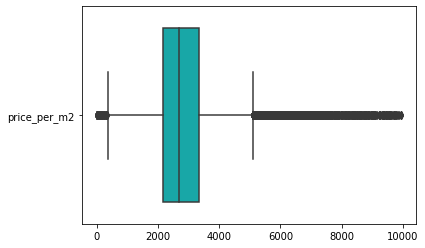

In [87]:
sns.boxplot(data=data, orient='h', color='c') 
plt.show()

In [88]:
# Elimino los Outliers
df =df.loc[(df['price_per_m2'] <= 10000) & (df['price_per_m2'] >= 500)] 

In [89]:
df.shape

(86493, 33)

In [90]:
df.loc[(df['price_per_m2']<500) & (df['state_name']=='Capital Federal'),['place_name','price_per_m2']].count()

place_name      0
price_per_m2    0
dtype: int64

In [91]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   15432
lat-lon                       35380
lat                           35380
lon                           35380
price                             0
currency                       1937
price_aprox_local_currency     1937
price_aprox_usd                1937
surface_total_in_m2           22849
surface_covered_in_m2             0
price_usd_per_m2              22849
price_per_m2                      0
floor                         80261
rooms                         50512
expenses                      74535
properati_url                     0
description                       1
title                             0
image_thumbnail                1547
_bcerrado                     83223
q3                                0
q1                          

### 4. Reducción de universo de observaciones.

Se conservarán solamente los tipo de propiedad PH, Departamento y Casa.

In [92]:
# Elimino los registros cuyo tipo de propiedad sea 'store'
df = df.drop(df.loc[df['property_type']=='store'].index)

### 5. Imputación Superficie Total (Valores Nulos)

In [93]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'), ['property_type','surface_total_in_m2','surface_covered_in_m2']]

,property_type,surface_total_in_m2,surface_covered_in_m2
68,apartment,NaN,72.0
77,apartment,NaN,85.0
79,apartment,NaN,42.0
89,apartment,NaN,53.0
92,apartment,NaN,73.0
109,apartment,NaN,60.0
112,apartment,NaN,90.0
120,apartment,NaN,55.0
143,apartment,NaN,36.0
145,apartment,NaN,183.0


In [94]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'),'surface_total_in_m2'] = df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'),'surface_covered_in_m2']

In [95]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'apartment'), ['property_type','surface_total_in_m2','surface_covered_in_m2']]

,property_type,surface_total_in_m2,surface_covered_in_m2


In [96]:
df['ratio_sup'] = df['surface_total_in_m2'] / df['surface_covered_in_m2']

In [97]:
df.loc[(df['surface_total_in_m2'].notnull()) & (df['property_type'] == 'PH'), ['ratio_sup']].mean()

ratio_sup    1.334421
dtype: float64

In [98]:
df.loc[(df['surface_total_in_m2'].notnull()) & (df['property_type'] == 'house'), ['ratio_sup']].mean()

ratio_sup    3.046683
dtype: float64

In [99]:
ratio_PH = df.loc[(df['property_type'] == 'PH')].groupby('place_name')['ratio_sup'].mean()

In [100]:
ratio_house = df.loc[(df['property_type'] == 'house')].groupby('place_name')['ratio_sup'].mean()

In [101]:
ratio_PH.index[1]

'Acassuso'

In [102]:
df['ratio_sup'].isnull().sum()

10039

In [103]:
for i in range(len(ratio_PH)):
    df.loc[(df['place_name']==ratio_PH.index[i]) & (df['property_type']=='PH'),['ratio_sup']] = ratio_PH[i]

In [104]:
df['ratio_sup'].isnull().sum()

8642

In [105]:
for i in range(len(ratio_house)):
    df.loc[(df['place_name']==ratio_house.index[i]) & (df['property_type']=='house'),['ratio_sup']] = ratio_house[i]

In [106]:
df['ratio_sup'].isnull().sum()

166

In [107]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'house'), ['surface_total_in_m2']] = df['surface_covered_in_m2'] * df['ratio_sup']

In [108]:
df.loc[(df['surface_total_in_m2'].isnull()) & (df['property_type'] == 'PH'), ['surface_total_in_m2']] = df['surface_covered_in_m2'] * df['ratio_sup']

In [109]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   15135
lat-lon                       34410
lat                           34410
lon                           34410
price                             0
currency                       1905
price_aprox_local_currency     1905
price_aprox_usd                1905
surface_total_in_m2             166
surface_covered_in_m2             0
price_usd_per_m2              22196
price_per_m2                      0
floor                         77948
rooms                         48227
expenses                      72483
properati_url                     0
description                       1
title                             0
image_thumbnail                1484
_bcerrado                     80930
q3                                0
q1                          

In [110]:
df = df.drop(df.loc[df['surface_total_in_m2'].isnull()].index)

In [111]:
df.isnull().sum()

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
country_name                      0
state_name                        0
geonames_id                   15098
lat-lon                       34343
lat                           34343
lon                           34343
price                             0
currency                       1905
price_aprox_local_currency     1905
price_aprox_usd                1905
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2              22030
price_per_m2                      0
floor                         77793
rooms                         48166
expenses                      72320
properati_url                     0
description                       1
title                             0
image_thumbnail                1481
_bcerrado                     80764
q3                                0
q1                          

### 6. Eliminar datos de superficies errorenas.

In [112]:
dfspm2 =df.loc[(df['surface_total_in_m2']) < (df['surface_covered_in_m2']), ('property_type','place_name',\
       'place_with_parent_names', 'country_name', 'state_name','surface_total_in_m2','surface_covered_in_m2',\
        'price_usd_per_m2', 'price_per_m2','description','title','qinf', 'qsup', 'outlier')]


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:868: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


In [113]:
dfspm2.count()

property_type              872
place_name                 872
place_with_parent_names      0
country_name               872
state_name                 872
surface_total_in_m2        872
surface_covered_in_m2      872
price_usd_per_m2           862
price_per_m2               872
description                872
title                      872
qinf                         0
qsup                         0
outlier                      0
dtype: int64

house        535
apartment    299
PH            38
Name: property_type, dtype: int64


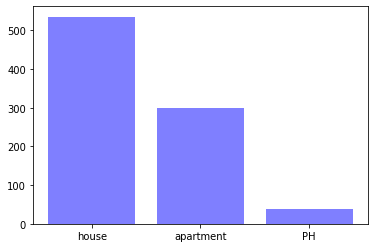

Bs.As. G.B.A. Zona Norte        306
Bs.As. G.B.A. Zona Oeste        164
Buenos Aires Costa Atlántica    122
Capital Federal                  81
Bs.As. G.B.A. Zona Sur           76
Córdoba                          50
Santa Fe                         45
Buenos Aires Interior            13
Misiones                          4
Chaco                             3
San Luis                          3
Mendoza                           2
Entre Ríos                        1
Corrientes                        1
Río Negro                         1
Name: state_name, dtype: int64


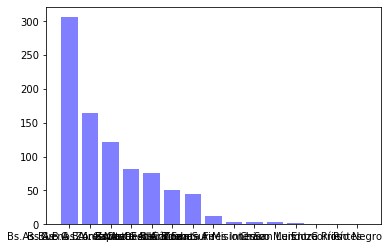

In [114]:
categories = ['property_type', 'state_name']

for category in categories:
    print(dfspm2[category].value_counts())
    plt.bar(dfspm2[category].value_counts().index, dfspm2[category].value_counts().values,color='b',\
            alpha=0.5)
    plt.show()

In [115]:
df.shape

(83988, 34)

In [116]:
df = df.loc[((df['surface_total_in_m2']) >= (df['surface_covered_in_m2'])) | (df['surface_total_in_m2'].isnull())]

In [117]:
df.shape

(83116, 34)

In [118]:
ame=df.loc[:,'description'].str.contains(r'/(?:PILETA|PISCINA|PATIO|TERRAZA|JARDIN|PARRILLA|ASADOR)', flags=re.IGNORECASE).astype('float')
df['ame']=ame
cochera=df.loc[:,'description'].str.contains(r'/(?:COCHERA|COCH)', flags=re.IGNORECASE).astype('float')
df['cochera']=cochera

### 7. Tratamiento de Ambientes - Se hace énfasis en Capital Federal

El dataframe a df_amb_caba surge de un agrupamiento por tipo de propiedad y estado

In [119]:
df_amb_caba = pd.read_csv('df_amb_caba.csv',sep=';')

In [120]:
df_amb_caba

,property_type,state_name,rooms,min,max
0,PH,Capital Federal,-1,0,19
1,PH,Capital Federal,1,20,35
2,PH,Capital Federal,2,36,45
3,PH,Capital Federal,3,46,65
4,PH,Capital Federal,4,66,96
5,PH,Capital Federal,5,97,120
6,PH,Capital Federal,6,121,170
7,PH,Capital Federal,7,171,186
8,PH,Capital Federal,8,187,190
9,PH,Capital Federal,9,191,231


In [121]:
df['description'] = df['description'].str.upper()
df['title'] = df['title'].str.upper()

In [122]:
df.loc[df['description'].isna(),'description']='-'

In [123]:
def finder(x):
    a = ''
    a = re.search('(\d{1,4})[ ](AMB)',x)
    if a:
        if int(a[1]) > 20:
            return 0
        return int(a[1])
    else:
        b = find_str(x)
        return b
    
def find_str(y):
    amb_texto = {'(UN AMB)':1, '(MONOAMB)':1, '(DOS AMB)':2, '(TRES AMB)':3, '(CUATRO AMB)':4, '(CINCO AMB)':5 ,'(SEIS AMB)':6,'(SIETE AMB)':7,'(OCHO AMB)':8,'(NUEVE AMB)':9}
    o = 0
    for i in amb_texto:
        b = re.search(i,y)
        if b:
            o = amb_texto[i]
            break
    return o

In [124]:
def amb_ref(mts, pt):
    a = df_amb_caba.loc[(df_amb_caba['property_type']==pt) & (df_amb_caba['min']<=mts) & (df_amb_caba['max']>=mts),'rooms']
    return int(a)

In [125]:
def compara_est(actual, calculado):
    if actual == 0:
        return calculado
    elif (calculado < actual) & (abs(actual - calculado) <4):
        return calculado
    else:
        return actual

Se identifican los ambientes en 0 en aquellos registros con NaN para que el proceso intente asignarle un valor

In [126]:
df.loc[df['rooms'].isna(),'rooms']=0

Se recorre el dataframe en búsqueda de identificar los ambientes para cada faltante

In [127]:
df['rooms_aux'] = 0
for i, row in df.iterrows():
    rooms =  row.rooms
    rooms_calc_title = finder(row.title)
    rooms_calc_descr = finder(row.description)
    flag_cambiado = False
    # evaluación del mejor 'room'. 0 significa que hay que cargarlo, mayor a 6 es una rareza o hay que reconfirmarlo
    if (rooms == 0 or rooms > 6):
        # primero evaluo si extraje del título un dato consistente
        if rooms_calc_title != 0:
            df.loc[i,'rooms_aux'] = rooms_calc_title
            df.loc[i,'rooms'] = rooms_calc_title #esta línea se descomenta cuando estamos seguros del proceso
            flag_cambiado = True
        elif rooms_calc_descr != 0: #evaluo si extraje de la descripción un dato consistente
            df.loc[i,'rooms_aux'] = rooms_calc_descr
            df.loc[i,'rooms'] = rooms_calc_descr #esta línea se descomenta cuando estamos seguros del proceso
            flag_cambiado = True
        #como nos quedamos solo con capital, veo de asignar un valor estadístico para esta localidad 
        #si el mismo no fue cambiado         
        if ((row.state_name=='Capital Federal') & (not flag_cambiado)):
            mts = row.surface_covered_in_m2 
            pt  = row.property_type 
            calc_est = amb_ref(mts, pt)
            df.loc[i,'rooms_aux'] = compara_est(rooms, calc_est)
            df.loc[i,'rooms'] = compara_est(rooms, calc_est) #esta línea se descomenta cuando estamos seguros del proceso
            
    else:
        df.loc[i,'rooms_aux'] = rooms

In [128]:
df.loc[(df['rooms_aux'] == -1) & (df['state_name'] == 'Capital Federal')].count()

Unnamed: 0                    86
operation                     86
property_type                 86
place_name                    86
country_name                  86
state_name                    86
geonames_id                   78
lat-lon                       45
lat                           45
lon                           45
price                         86
currency                      86
price_aprox_local_currency    86
price_aprox_usd               86
surface_total_in_m2           86
surface_covered_in_m2         86
price_usd_per_m2              83
price_per_m2                  86
floor                          0
rooms                         86
expenses                       5
properati_url                 86
description                   86
title                         86
image_thumbnail               84
_bcerrado                      3
q3                            86
q1                            86
q05                           86
q95                           86
iqr       

In [129]:
df.loc[(df['rooms_aux'].isnull()) & (df['state_name'] == 'Capital Federal')].count()

Unnamed: 0                    0
operation                     0
property_type                 0
place_name                    0
country_name                  0
state_name                    0
geonames_id                   0
lat-lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
_bcerrado                     0
q3                            0
q1                            0
q05                           0
q95                           0
iqr                           0
q3+1.5iq

In [130]:
df.loc[(df['rooms_aux'] == 0) & (df['state_name'] == 'Capital Federal')].count()

Unnamed: 0                    0
operation                     0
property_type                 0
place_name                    0
country_name                  0
state_name                    0
geonames_id                   0
lat-lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
_bcerrado                     0
q3                            0
q1                            0
q05                           0
q95                           0
iqr                           0
q3+1.5iq

In [131]:
# Elimino los registros que no se pudo identificar la cantidad de ambiente - 132 Registros. NOTA: con valor -1 serán solo 
# los de Capital Federal, más allá que luego serán borrados también otras localidades/provincias
df = df.drop(df.loc[df['rooms_aux']==-1].index)
df = df.drop(df.loc[df['rooms']==-1].index)

In [132]:
aux = df.groupby(['property_type','state_name','rooms_aux'])['surface_covered_in_m2'].aggregate([np.min, np.mean, np.median, np.max,  np.nanstd])

In [133]:
aux = aux.reset_index()

In [134]:
aux.loc[(aux['state_name']=='Capital Federal'),('property_type','rooms_aux','median')]

,property_type,rooms_aux,median
35,PH,1.0,34.5
36,PH,2.0,45.0
37,PH,3.0,64.0
38,PH,4.0,95.0
39,PH,5.0,120.0
40,PH,6.0,160.0
41,PH,7.0,182.5
42,PH,8.0,250.0
43,PH,9.0,215.0
44,PH,10.0,255.0


In [135]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', '_bcerrado', 'q3', 'q1',
       'q05', 'q95', 'iqr', 'q3+1.5iqr', 'q1-1.5iqr', 'ratio_sup', 'ame',
       'cochera', 'rooms_aux'],
      dtype='object')

In [136]:
df = df.drop(['rooms_aux'], axis=1)

In [137]:
df.shape

(83030, 36)

### 8. Reducción de observaciones & variables para el modelo.

In [138]:
dfcf = df.loc[(df['state_name'] == 'Capital Federal')]

In [139]:
# Elimino la columna state_name.
dfcf['state_name'].unique()
dfcf.drop(['state_name'],axis=1,inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [140]:
dfcf.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'country_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', '_bcerrado', 'q3', 'q1',
       'q05', 'q95', 'iqr', 'q3+1.5iqr', 'q1-1.5iqr', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [141]:
dfcf = dfcf.drop(['Unnamed: 0'], axis=1)
dfcf = dfcf.drop(['operation'], axis=1)
dfcf = dfcf.drop(['country_name'], axis=1)
dfcf = dfcf.drop(['geonames_id'], axis=1)
dfcf = dfcf.drop(['lat-lon'], axis=1)
dfcf = dfcf.drop(['lat'], axis=1)
dfcf = dfcf.drop(['lon'], axis=1)
dfcf = dfcf.drop(['price'], axis=1)
dfcf = dfcf.drop(['currency'], axis=1)
dfcf = dfcf.drop(['price_aprox_local_currency'], axis=1)
dfcf = dfcf.drop(['price_aprox_usd'], axis=1)
dfcf = dfcf.drop(['price_usd_per_m2'], axis=1)
dfcf = dfcf.drop(['floor'], axis=1)
dfcf = dfcf.drop(['expenses'], axis=1)
dfcf = dfcf.drop(['properati_url'], axis=1)
dfcf = dfcf.drop(['description'], axis=1)
dfcf = dfcf.drop(['title'], axis=1)
dfcf = dfcf.drop(['image_thumbnail'], axis=1)
dfcf = dfcf.drop(['q1'], axis=1)
dfcf = dfcf.drop(['q3'], axis=1)
dfcf = dfcf.drop(['q05'], axis=1)
dfcf = dfcf.drop(['q95'], axis=1)
dfcf = dfcf.drop(['iqr'], axis=1)
dfcf = dfcf.drop(['q3+1.5iqr'], axis=1)
dfcf = dfcf.drop(['q1-1.5iqr'], axis=1)
dfcf = dfcf.drop(['_bcerrado'], axis=1)

In [142]:
dfcf.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_per_m2', 'rooms', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [143]:
dfcf.columns = ['tipo_propiedad', 'localidad', 'sup_total','sup_cubierta','precio_m2','ambientes','ratio_sup','amenities','cochera']

In [144]:
dfcf.columns

Index(['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'precio_m2',
       'ambientes', 'ratio_sup', 'amenities', 'cochera'],
      dtype='object')

In [145]:
dfcf.shape

(25384, 9)

In [146]:
SupCubMedia= pd.DataFrame(dfcf.groupby(['localidad','tipo_propiedad'])['sup_cubierta'].mean())

In [147]:
SupCubMediana= pd.DataFrame(dfcf.groupby(['localidad','tipo_propiedad'])['sup_cubierta'].median())

In [148]:
for i in range(len(SupCubMedia)):
    dfcf.loc[(dfcf['localidad']==SupCubMedia.index[i][0]) & (dfcf['tipo_propiedad']==SupCubMedia.index[i][-1]),\
       'SupCubMedia'] = SupCubMedia.values[i].round(1)

In [149]:
for i in range(len(SupCubMediana)):
    dfcf.loc[(dfcf['localidad']==SupCubMediana.index[i][0]) & (dfcf['tipo_propiedad']==SupCubMediana.index[i][-1]),\
       'SupCubMediana'] = SupCubMediana.values[i]

In [150]:
dfcf.columns

Index(['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'precio_m2',
       'ambientes', 'ratio_sup', 'amenities', 'cochera', 'SupCubMedia',
       'SupCubMediana'],
      dtype='object')

In [151]:
dfcf.loc[(dfcf['sup_cubierta'] > 300) & (dfcf['tipo_propiedad'] == 'PH'),['sup_cubierta','SupCubMedia','SupCubMediana']]

,sup_cubierta,SupCubMedia,SupCubMediana
4770,324.0,117.4,97.0
10592,400.0,92.5,80.0
16036,360.0,117.4,97.0
25569,340.0,88.7,73.5
39279,373.0,111.6,102.0
40934,360.0,86.7,76.0
47149,350.0,116.6,92.0
48938,450.0,93.6,76.0
52429,360.0,94.5,74.0
60990,530.0,126.3,113.0


Imputamos valores de Superficie Cubierta Media en aquellos registros donde la misma sea mayor a 300 en PH y Apartamentos y 400 en casas.

In [152]:
dfcf.loc[(dfcf['sup_cubierta'] > 200) & (dfcf['tipo_propiedad'] == 'PH'),'sup_cubierta'] = \
dfcf.loc[(dfcf['sup_cubierta'] > 200) & (dfcf['tipo_propiedad'] == 'PH'),'SupCubMediana']

In [153]:
dfcf.loc[(dfcf['sup_cubierta'] > 200) & (dfcf['tipo_propiedad'] == 'apartment'),'sup_cubierta'] = \
dfcf.loc[(dfcf['sup_cubierta'] > 200) & (dfcf['tipo_propiedad'] == 'apartment'),'SupCubMediana']

In [154]:
dfcf.loc[(dfcf['sup_cubierta'] > 400) & (dfcf['tipo_propiedad'] == 'house'),'sup_cubierta'] = \
dfcf.loc[(dfcf['sup_cubierta'] > 400) & (dfcf['tipo_propiedad'] == 'house'),'SupCubMediana']

In [155]:
dfcf.loc[(dfcf['sup_cubierta'] > 300) & (dfcf['tipo_propiedad'] == 'apartment')]#.count() .aggregate([np.min, np.max, np.mean, np.median])

,tipo_propiedad,localidad,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,SupCubMedia,SupCubMediana


In [156]:
dfcf.shape

(25384, 11)

In [157]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] < 10) & (dfcf['tipo_propiedad'] == 'apartment')].index)

In [158]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] < 10) & (dfcf['tipo_propiedad'] == 'PH')].index)

In [159]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] < 20) & (dfcf['tipo_propiedad'] == 'house')].index)

In [160]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] > 300) & (dfcf['tipo_propiedad'] == 'apartment')].index)

In [161]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] > 300) & (dfcf['tipo_propiedad'] == 'PH')].index)

In [162]:
dfcf = dfcf.drop(dfcf.loc[(dfcf['sup_cubierta'] > 600) & (dfcf['tipo_propiedad'] == 'house')].index)

In [163]:
dfcf.drop(['SupCubMediana'],axis=1,inplace=True)

In [164]:
dfcf.drop(['SupCubMedia'],axis=1,inplace=True)

In [165]:
dfcf.shape

(25384, 9)

In [166]:
dfcf.isnull().sum()

tipo_propiedad    0
localidad         0
sup_total         0
sup_cubierta      0
precio_m2         0
ambientes         0
ratio_sup         0
amenities         0
cochera           0
dtype: int64

#### Calculamos la media y mediana del precio_m2 agrupado por localidad y tipo de propiedad.

In [167]:
dfcf['precio_m2'] = dfcf['precio_m2'].astype(float)

In [168]:
precio_m2_Media= pd.DataFrame(dfcf.groupby(['localidad','tipo_propiedad'])['precio_m2'].mean())

In [169]:
precio_m2_Mediana= pd.DataFrame(dfcf.groupby(['localidad','tipo_propiedad'])['precio_m2'].median())

In [170]:
for i in range(len(precio_m2_Media)):
    dfcf.loc[(dfcf['localidad']==precio_m2_Media.index[i][0]) & (dfcf['tipo_propiedad']==precio_m2_Media.index[i][-1]),\
       'precio_m2_Media'] = precio_m2_Media.values[i].round(1)

In [171]:
for i in range(len(precio_m2_Mediana)):
    dfcf.loc[(dfcf['localidad']==precio_m2_Mediana.index[i][0]) & (dfcf['tipo_propiedad']==precio_m2_Mediana.index[i][-1]),\
       'precio_m2_Mediana'] = precio_m2_Mediana.values[i].round(1)

In [172]:
dfcf['amenities'] = dfcf.amenities.astype(int)
dfcf['cochera'] = dfcf.cochera.astype(int)

### 9. Generar nuevas variables.

In [173]:
dfcf.sample(5)

,tipo_propiedad,localidad,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,precio_m2_Media,precio_m2_Mediana
2685,apartment,Barrio Norte,48.0,40.0,3875.0,1.0,1.200000,0,0,3344.9,3050.0
59129,apartment,Barrio Norte,64.0,64.0,2690.0,3.0,1.000000,0,0,3344.9,3050.0
48767,apartment,Centro / Microcentro,29.0,27.0,3680.0,1.0,1.074074,0,0,2539.0,2300.0
44875,apartment,Almagro,18.0,18.0,2390.0,1.0,1.000000,0,0,2452.5,2360.0
114432,apartment,Tribunales,63.0,63.0,1630.0,3.0,1.000000,0,0,2315.4,2125.0


In [174]:
dfcf['precio_m2'].mean()

2916.8367529945695

In [175]:
dfcf['ratio_price'] = dfcf['precio_m2'] / dfcf['precio_m2'].mean()

In [176]:
dfcf['ratio_price'].aggregate([np.min, np.max, np.mean, np.median])

amin      0.178275
amax      3.428372
mean      1.000000
median    0.925660
Name: ratio_price, dtype: float64

In [177]:
dfcf.shape

(25384, 12)

In [178]:
dfcf.sample(5)

,tipo_propiedad,localidad,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,precio_m2_Media,precio_m2_Mediana,ratio_price
11060,apartment,Puerto Madero,170.0,170.0,4590.0,3.0,1.000000,0,0,6307.5,6000.0,1.573623
37627,PH,Parque Patricios,60.0,45.0,1420.0,2.0,1.317839,0,0,2432.8,1785.0,0.486829
75833,apartment,Belgrano,156.0,130.0,2750.0,5.0,1.200000,0,0,3548.5,3360.0,0.942802
112326,apartment,Almagro,126.0,120.0,3000.0,3.0,1.050000,0,0,2452.5,2360.0,1.028511
78609,apartment,Flores,43.0,39.0,3000.0,2.0,1.102564,0,0,2273.3,2270.0,1.028511


Agregado de Comuna por Barrio

In [179]:
dfcf_comunas = pd.read_csv('barrios_comunas.csv',sep=';')

In [180]:
dfcf = dfcf.merge(dfcf_comunas, how='left', left_on='localidad', right_on='barrio')

In [181]:
dfcf = dfcf.drop(['barrio'], axis=1)

Generación de Promedios por Comuna

In [182]:
dfcaba_comuna = dfcf.groupby(['tipo_propiedad','comuna'])['precio_m2'].aggregate([np.mean, np.median])

In [183]:
dfcaba_comuna = dfcaba_comuna.reset_index()

In [184]:
dfcaba_comuna.columns = ['tipo_propiedad', 'comuna', 'precio_m2_prome_comuna','precio_m2_mediana_comuna']

In [185]:
dfcf = dfcf.merge(dfcaba_comuna, how='left')

In [186]:
dfcf['ratio_precio_barrio'] = dfcf['precio_m2'] / dfcf['precio_m2_Media']
dfcf['ratio_precio_comuna'] = dfcf['precio_m2'] / dfcf['precio_m2_prome_comuna']

In [187]:
export_csv = dfcf.to_csv (r'df_caba.csv', index = None, header=True)

# Hago lo mismo para GBA

In [188]:
df['state_name'].unique()

array(['Capital Federal', 'Buenos Aires Costa Atlántica',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba',
       'Bs.As. G.B.A. Zona Sur', 'Santa Fe', 'Misiones', 'Entre Ríos',
       'Buenos Aires Interior', 'Neuquén', 'Río Negro', 'Mendoza',
       'Corrientes', 'Salta', 'Chubut', 'Chaco', 'Tierra Del Fuego',
       'San Luis', 'Catamarca', 'Tucumán', 'Santa Cruz', 'La Pampa',
       'Santiago Del Estero', 'Jujuy', 'San Juan'], dtype=object)

In [189]:
dfgba = df.loc[(df['state_name'] == 'Bs.As. G.B.A. Zona Norte') | (df['state_name'] == 'Bs.As. G.B.A. Zona Oeste') | (df['state_name'] == 'Bs.As. G.B.A. Zona Sur')]

In [190]:
dfgba.head()

,Unnamed: 0,operation,property_type,place_name,country_name,state_name,geonames_id,lat-lon,lat,lon,...,q3,q1,q05,q95,iqr,q3+1.5iqr,q1-1.5iqr,ratio_sup,ame,cochera
6,6,sell,PH,Munro,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,2170.0,1537.5,1060.000,3252.5,632.5,3118.75,588.75,1.286395,0.0,0.0
12,12,sell,apartment,Martínez,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,...,4400.0,2862.5,1974.500,5247.5,1537.5,6706.25,556.25,1.083333,0.0,0.0
17,17,sell,apartment,Tigre,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,...,2980.0,2180.0,1730.000,3910.0,800.0,4180.00,980.00,2.256410,0.0,0.0
18,18,sell,house,Tigre,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579659,...,2120.0,1580.0,1240.000,3200.0,540.0,2930.00,770.00,2.025313,0.0,0.0
22,22,sell,house,General Rodríguez,Argentina,Bs.As. G.B.A. Zona Oeste,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,-58.966034,...,1782.5,1100.0,724.375,2535.0,682.5,2806.25,76.25,10.863051,0.0,0.0


In [191]:
dfgba['state_name'].unique()
dfgba.drop(['state_name'],axis=1,inplace=True)

In [192]:
dfgba['description'] = dfgba['description'].str.upper()
dfgba['title'] = dfgba['title'].str.upper()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [193]:
dfgba.loc[df['description'].isna(),'description']='-'

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [194]:
dfgba=dfgba.droop[dfgba]

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'country_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', '_bcerrado', 'q3', 'q1',
       'q05', 'q95', 'iqr', 'q3+1.5iqr', 'q1-1.5iqr', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [206]:
def amb_refgba(mts, pt):
    a = dfgba.loc[(dfgba['property_type']==pt) & (dfgba['min']<=mts) & (dfgba['max']>=mts),'rooms']
    return int(a)


In [207]:
dfgba.loc[dfgba['rooms'].isna(),'rooms']=0

In [208]:
dfgba['rooms_aux'] = 0

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
dfgba.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'country_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', '_bcerrado', 'q3', 'q1',
       'q05', 'q95', 'iqr', 'q3+1.5iqr', 'q1-1.5iqr', 'ratio_sup', 'ame',
       'cochera'],
      dtype='object')

In [206]:
#dfgba = dfgba.drop(['Unnamed: 0'], axis=1)
#dfgba = dfgba.drop(['operation'], axis=1)
#dfgba = dfgba.drop(['country_name'], axis=1)
#dfgba = dfgba.drop(['geonames_id'], axis=1)
#dfgba = dfgba.drop(['lat-lon'], axis=1)
#dfgba = dfgba.drop(['lat'], axis=1)
#dfgba = dfgba.drop(['lon'], axis=1)
#dfgba = dfgba.drop(['price'], axis=1)
#dfgba = dfgba.drop(['currency'], axis=1)
#dfgba = dfgba.drop(['price_aprox_local_currency'], axis=1)
#dfgba = dfgba.drop(['price_aprox_usd'], axis=1)
#dfgba = dfgba.drop(['price_usd_per_m2'], axis=1)
#dfgba = dfgba.drop(['floor'], axis=1)
#dfgba = dfgba.drop(['expenses'], axis=1)
#dfgba = dfgba.drop(['properati_url'], axis=1)
#dfgba = dfgba.drop(['description'], axis=1)
#dfgba = dfgba.drop(['title'], axis=1)
#dfgba = dfgba.drop(['image_thumbnail'], axis=1)
#dfgba = dfgba.drop(['q1'], axis=1)
#dfgba = dfgba.drop(['q3'], axis=1)
#dfgba = dfgba.drop(['q05'], axis=1)
#dfgba = dfgba.drop(['q95'], axis=1)
#dfgba = dfgba.drop(['iqr'], axis=1)
#dfgba = dfgba.drop(['q3+1.5iqr'], axis=1)
#dfgba = dfgba.drop(['q1-1.5iqr'], axis=1)
#dfgba = dfgba.drop(['_bcerrado'], axis=1)
dfgba = dfgba.drop([(dfgba['rooms']==0)], axis=0)
dfgba.columns

KeyError: '[(True, False, False, True, True, False, False, False, True, True, False, True, False, False, False, True, True, False, True, False, True, False, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, True, True, False, True, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, True, True, False, False, False, False, True, False, False, False, False, False, True, True, True, True, False, True, False, True, True, False, False, True, True, True, False, True, True, True, False, False, True, False, True, True, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, True, False, True, False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, False, True, False, True, True, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, True, True, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, True, True, False, False, True, False, True, False, False, False, False, True, True, True, False, True, True, True, False, False, False, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, True, True, True, False, True, False, False, True, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, True, True, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, True, False, True, True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, True, False, False, False, False, True, True, False, True, False, False, True, True, False, True, True, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, False, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False, False, False, False, True, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, False, False, True, False, False, False, False, False, True, True, False, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, False, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, True, False, True, True, False, True, True, False, False, False, True, True, True, True, True, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, False, True, True, False, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, True, False, False, False, True, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, True, True, False, True, True, True, False, False, False, True, True, False, False, False, False, False, True, False, True, True, False, False, False, False, True, False, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, True, False, False, False, False, True, True, False, False, False, True, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, True, True, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, True, False, True, True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, True, False, False, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, False, True, True, True, True, True, False, False, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, True, True, False, False, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, False, True, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, False, True, False, True, False, False, False, True, True, True, False, True, False, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, True, True, False, True, True, True, False, False, True, True, True, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, True, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, True, True, True, True, True, False, False, False, False, False, True, False, True, True, False, False, False, False, True, False, True, True, True, True, True, False, False, True, True, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, False, False, False, True, True, True, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False, True, True, True, False, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, False, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True, False, False, True, False, False, True, True, False, True, False, True, True, False, True, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, True, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, True, False, False, False, True, True, False, False, True, False, False, False, True, True, True, False, False, True, False, True, True, True, False, False, True, True, False, False, True, False, False, False, True, True, True, True, False, False, True, True, True, False, True, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, True, False, True, False, True, False, False, False, True, False, True, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, True, True, True, True, True, True, False, False, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, True, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, False, True, False, True, True, True, True, False, False, True, True, True, True, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, False, True, True, True, False, False, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, False, True, True, False, False, False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, False, True, True, False, True, False, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, True, True, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, True, False, True, True, False, False, False, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, True, True, False, False, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, True, False, False, True, False, True, False, True, False, False, False, True, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, False, False, False, False, False, True, True, False, False, True, False, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, True, True, True, True, False, False, True, True, True, False, True, True, False, True, False, True, True, False, True, False, True, True, False, False, False, False, False, True, False, True, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, True, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, True, True, False, True, False, False, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, False, True, True, False, False, True, True, True, True, True, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, False, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, False, True, True, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, False, True, False, True, True, True, False, True, False, True, True, True, True, False, False, False, False, True, False, False, True, True, False, True, True, True, True, True, True, False, False, False, True, False, False, True, True, False, True, False, True, False, False, True, False, False, True, False, False, True, False, False, False, False, True, False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, True, False, True, False, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, False, True, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, False, False, True, False, True, True, True, True, True, False, False, True, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, True, True, True, False, False, True, True, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, False, True, False, True, False, True, False, True, False, False, True, True, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, True, True, True, True, False, False, True, False, True, True, True, False, False, True, False, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, False, False, True, False, True, False, False, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, True, False, False, True, False, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, False, True, True, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, False, True, False, False, True, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, True, False, False, True, True, True, False, False, False, True, True, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, True, True, True, False, False, False, True, True, False, True, True, True, False, True, True, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, False, False, True, False, False, True, True, True, True, False, True, False, False, True, False, False, True, True, False, True, False, False, False, True, True, True, False, False, True, False, True, False, False, False, True, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, False, True, True, False, False, False, False, False, False, True, True, True, False, True, True, False, False, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, False, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, False, True, True, True, True, False, False, False, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, True, True, False, False, True, True, True, True, True, False, False, False, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, False, True, True, True, False, False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, True, True, False, False, False, True, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, True, True, True, True, True, False, False, True, False, True, False, True, True, True, False, True, False, True, False, False, False, True, False, True, True, False, True, True, True, False, True, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, True, True, True, True, True, True, False, False, False, False, True, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, False, False, True, True, True, True, True, False, True, False, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, True, True, True, True, False, False, False, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, False, False, True, False, False, False, False, False, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, True, False, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, True, False, True, True, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, False, True, True, True, False, True, False, False, False, False, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, False, True, False, False, False, True, False, True, True, True, True, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, True, True, True, False, False, True, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, True, True, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, True, False, True, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, True, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, False, False, True, True, False, True, True, True, True, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, True, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, True, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, False, False, False, True, True, False, True, False, False, False, True, True, True, False, False, True, True, True, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, True, True, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, True, True, False, False, False, True, False, True, False, True, False, True, True, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, False, True, False, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, True, True, True, True, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, True, True, False, True, True, True, False, False, False, False, False, False, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, True, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, True, False, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, False, True, False, True, False, True, True, True, True, False, False, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, False, False, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, False, True, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, False, False, True, False, True, False, True, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, True, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, False, False, True, True, True, True, True, True, False, True, False, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, False, True, False, False, False, True, True, True, False, True, False, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, True, False, False, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, True, False, False, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, True, False, False, True, True, True, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, False, True, False, False, True, False, False, False, True, False, False, True, True, True, True, True, False, False, False, True, False, True, False, True, False, False, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, False, True, True, False, True, True, True, False, False, True, False, False, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, True, False, True, False, True, False, False, False, True, False, True, True, False, True, True, True, True, True, False, True, False, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, False, True, False, False, True, False, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False, False, False, True, True, True, True, False, False, True, False, False, False, False, True, False, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, False, True, False, True, True, False, True, False, True, False, True, False, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, False, True, True, False, True, False, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, False, True, True, True, False, True, True, True, True, True, False, False, False, True, True, False, False, False, False, True, False, True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, False, True, False, False, False, True, True, False, True, True, False, True, False, True, False, False, True, False, True, True, True, True, True, True, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, False, True, False, True, True, True, True, True, True, True, False, False, False, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, False, False, True, True, True, True, False, False, True, True, True, False, True, False, True, False, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, True, True, True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, True, False, True, True, True, False, False, False, True, False, True, True, True, False, False, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, True, True, False, True, False, True, True, True, False, False, False, True, True, False, True, False, True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, False, False, True, False, False, True, True, True, True, False, False, True, False, True, True, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, True, True, True, False, True, False, True, False, False, True, True, False, False, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, False, True, True, False, True, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, True, True, True, False, True, False, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, False, False, False, True, False, True, True, False, True, True, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, False, False, True, True, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, False, True, False, False, True, True, False, True, True, True, False, True, False, False, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, True, False, True, True, True, False, False, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, True, True, False, True, True, True, False, False, True, False, True, True, True, True, True, False, True, True, True, False, True, False, False, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, True, False, True, False, True, False, False, True, True, False, True, True, False, False, False, True, False, False, False, True, True, False, False, True, False, False, True, False, False, False, True, False, True, True, False, False, True, True, True, True, True, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, False, False, False, True, True, True, False, True, True, False, True, False, True, False, True, False, True, False, False, False, False, True, True, True, False, False, True, False, True, True, False, False, False, True, True, True, True, True, True, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, True, True, False, True, False, True, False, False, False, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, True, True, True, True, False, True, True, False, True, True, True, False, True, False, False, True, False, True, False, True, False, True, False, False, False, False, True, True, False, False, False, True, False, False, False, True, True, False, True, True, True, False, False, False, True, True, False, True, False, False, False, True, True, True, True, False, False, False, True, True, True, False, False, False, False, False, True, False, True, False, False, False, True, False, True, True, True, True, True, False, True, True, False, False, True, True, True, False, False, False, True, True, False, False, False, True, False, True, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, True, False, False, True, True, False, False, False, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, False, False, False, True, True, False, True, False, True, False, True, False, True, False, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, False, False, True, False, True, True, False, False, False, True, True, True, False, True, True, False, True, True, False, True, False, False, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, True, True, False, True, False, True, False, True, False, True, True, False, False, False, False, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, False, False, True, False, True, True, False, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, False, True, False, False, False, True, True, True, True, False, True, False, False, True, True, True, False, False, False, False, True, False, True, False, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, False, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, False, True, False, True, False, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, False, True, True, True, True, True, False, True, False, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, False, True, False, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, False, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, False, False, True, False, True, False, False, True, True, True, False, True, False, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, False, True, False, False, True, False, False, False, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, False, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, True, True, False, True, False, True, False, True, False, False, False, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, False, False, False, True, True, False, False, True, True, False, False, True, False, False, False, False, False, True, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, False, True, True, True, True, False, True, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, False, False, True, True, True, True, False, False, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, False, False, False, True, False, False, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, True, True, False, False, True, True, True, True, False, False, True, True, False, False, True, False, True, False, False, True, False, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, True, True, False, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, False, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, False, False, False, True, False, False, True, False, False, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, False, True, True, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, False, True, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, True, False, True, False, False, False, True, True, True, True, False, True, False, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, True, False, True, False, False, False, True, False, True, True, False, False, True, False, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, True, True, True, False, False, False, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, False, True, False, False, False, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, True, False, False, True, True, True, True, False, False, True, True, False, True, False, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, False, True, False, True, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, False, False, True, False, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, True, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, True, False, True, False, True, True, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, True, False, True, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, True, True, False, True, True, True, False, False, False, False, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, False, True, False, True, False, False, True, False, False, True, True, False, False, True, False, True, True, False, True, True, False, True, True, True, False, False, True, False, True, True, False, True, True, False, True, False, True, False, True, False, False, False, True, False, True, True, True, False, False, False, False, True, False, True, True, False, False, True, False, True, True, True, False, False, True, False, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, False, False, True, False, True, True, True, True, False, True, False, False, False, True, True, False, True, True, True, False, False, False, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, True, False, True, True, False, True, True, False, False, True, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, False, True, True, False, False, False, True, False, True, False, True, True, False, True, False, False, True, True, True, True, True, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, True, True, False, False, True, False, True, True, True, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, False, False, False, True, True, True, False, True, True, True, False, False, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, False, False, True, False, True, False, True, True, False, True, True, False, True, True, False, True, True, False, False, True, True, True, True, False, False, True, False, True, False, False, True, True, False, True, False, False, True, False, True, True, True, True, True, True, True, False, False, True, False, False, True, False, True, True, False, True, True, False, False, True, True, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, True, True, True, False, True, False, False, False, False, True, True, False, True, False, True, False, True, False, True, True, True, False, False, True, True, False, False, True, True, False, False, False, False, True, False, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, True, False, True, False, True, False, True, True, True, False, True, True, True, False, True, True, False, True, True, False, False, False, False, False, True, False, True, True, True, False, True, True, True, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, False, False, False, False, True, True, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, False, False, True, False, True, False, True, True, False, True, True, True, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, False, True, False, True, True, False, True, False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, False, True, True, False, False, True, False, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, False, True, True, False, True, True, True, True, False, False, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, False, False, True, True, False, True, True, False, True, False, False, True, False, True, False, False, True, True, False, True, False, True, False, True, True, False, True, False, False, False, True, True, True, True, False, False, True, True, False, False, True, False, False, True, False, False, True, True, True, True, True, True, False, True, True, False, False, True, False, True, False, True, False, True, True, False, True, False, False, True, True, True, True, False, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, False, True, True, True, False, False, False, True, True, True, True, True, False, True, True, False, False, True, True, True, False, False, True, True, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, False, True, True, True, True, False, False, False, False, True, True, True, False, True, False, True, True, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, False, True, True, True, False, True, False, True, False, True, True, True, True, True, True, False, False, True, False, True, True, False, True, False, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, False, True, False, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, True, True, False, False, True, True, False, False, True, True, True, False, False, True, True, False, False, False, False, True, True, False, True, False, False, True, True, False, False, True, True, True, True, True, False, False, False, False, True, False, False, True, False, True, False, False, True, True, False, True, False, True, True, True, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, True, True, True, True, True, False, True, False, False, True, False, True, False, True, True, False, False, False, False, True, False, True, False, True, False, True, False, False, False, False, True, True, False, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, False, True, True, False, False, True, False, False, False, False, True, True, False, False, True, True, True, True, False, True, True, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, False, True, True, True, True, False, True, True, False, True, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, True, False, False, True, True, False, False, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, False, True, True, False, True, True, True, False, True, False, True, True, False, False, False, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, True, False, False, False, False, True, True, False, True, False, False, False, True, False, False, False, True, False, True, False, True, True, False, False, True, False, False, True, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, False, False, False, False, False, False, True, True, False, True, True, True, True, False, False, True, False, False, False, True, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, False, False, True, False, False, False, False, False, True, True, True, True, False, False, True, True, False, False, True, True, False, False, True, False, False, True, False, True, True, False, True, True, False, False, False, False, True, False, False, True, True, True, True, False, False, True, False, True, False, False, False, True, True, False, False, False, True, True, False, False, True, True, False, False, True, False, False, False, True, False, False, False, True, False, True, True, True, False, False, False, True, False, False, False, False, True, True, False, False, True, True, False, True, False, True, True, True, False, True, False, False, False, True, False, True, False, True, True, True, True, True, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, True, True, True, False, True, True, False, False, True, True, True, False, False, True, False, False, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, False, True, False, False, False, False, True, False, False, False, True, True, True, False, False, False, True, False, True, True, False, True, False, True, True, False, True, True, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, False, True, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, True, True, False, False, True, True, False, True, False, True, False, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, False, True, True, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, True, True, False, False, True, True, True, False, True, True, True, False, False, False, True, True, True, False, False, True, False, False, True, True, True, True, False, True, False, False, False, False, True, False, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, False, False, True, False, True, False, False, False, True, True, True, False, False, True, False, False, True, True, True, True, True, False, False, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, True, True, True, False, False, False, False, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, True, True, False, True, False, False, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, False, True, True, False, True, False, False, True, False, True, True, False, True, True, True, True, True, False, True, True, False, True, False, False, False, True, False, False, True, True, True, False, False, False, True, True, True, True, True, False, False, False, False, True, False, True, True, True, True, True, False, False, True, True, False, True, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, True, False, False, True, False, True, True, True, False, False, True, False, True, True, True, True, False, False, True, False, False, False, False, True, True, False, False, True, False, True, False, True, False, False, True, False, False, False, False, True, True, True, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, True, True, False, True, False, True, True, False, True, False, True, True, False, False, False, True, True, False, False, False, True, False, True, False, True, False, False, True, False, True, False, False, False, True, True, True, False, False, True, True, False, True, False, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, True, False, False, True, True, True, False, False, False, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, False, False, True, True, False, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, False, False, True, False, True, True, True, True, True, False, True, True, False, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, True, True, False, True, True, True, False, False, True, False, False, True, False, True, False, True, True, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, True, False, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, False, False, False, False, True, False, False, False, True, True, False, False, True, False, True, True, False, True, False, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, True, True, False, False, True, False, True, True, False, True, True, True, False, True, False, True, False, False, True, True, True, False, False, True, True, False, False, True, True, False, False, False, True, True, True, False, True, True, False, True, False, False, True, True, False, True, True, False, False, True, True, True, False, False, True, True, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, False, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, False, True, False, True, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, True, True, False, False, False, True, False, True, False, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, True, True, True, True, False, False, True, True, False, False, True, False, True, True, False, False, True, True, False, False, True, True, False, True, True, False, True, True, True, False, False, True, False, True, False, False, False, False, False, True, True, True, True, False, False, True, True, True, False, True, True, False, False, True, False, True, False, False, False, True, False, True, True, True, False, False, False, False, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, False, True, False, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, False, True, True, True, True, False, False, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, False, True, True, True, False, True, True, False, True, False, False, False, True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, False, True, False, False, False, True, True, True, True, True, False, False, True, False, False, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, True, False, False, False, True, False, True, True, False, True, False, True, True, False, True, True, False, False, False, False, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, False, False, False, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, False, True, True, False, True, False, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, False, True, False, False, True, False, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, True, False, True, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, True, True, False, True, False, True, True, False, True, False, True, True, False, False, False, False, True, False, True, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, False, True, True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, False, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, False, False, True, True, True, True, False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, True, True, False, True, False, True, True, True, False, False, False, True, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, False, True, True, True, False, True, False, True, True, False, True, True, False, False, True, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, True, False, True, False, True, False, True, False, False, True, True, True, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, False, True, False, True, True, False, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, False, True, True, True, False, True, False, True, True, True, False, True, False, True, True, False, False, False, True, False, True, False, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, False, False, True, True, False, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, False, True, False, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, False, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, False, False, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, True, False, False, True, True, True, False, True, True, True, False, False, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, True, False, False, True, False, True, False, False, True, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, False, False, True, False, True, True, False, True, True, False, False, False, True, False, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, True, True, False, True, False, True, False, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, False, True, True, True, False, True, False, False, False, True, True, False, False, True, True, False, False, True, True, True, True, False, True, True, True, False, True, False, False, True, False, True, False, True, True, True, True, False, True, True, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, False, False, True, True, False, True, True, True, False, True, True, True, False, True, False, False, True, True, False, True, False, True, False, True, True, True, False, True, True, False, False, False, True, False, True, False, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, True, True, False, False, True, False, False, True, False, False, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, False, False, False, False, True, True, False, True, False, False, True, False, False, True, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, True, False, True, False, True, False, True, False, True, True, False, False, False, True, False, False, True, False, True, False, True, False, True, False, True, False, True, True, False, False, False, False, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, True, True, False, True, False, True, True, False, False, False, False, True, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, True, False, True, False, True, True, True, False, True, True, True, False, True, False, False, True, False, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, True, True, False, False, True, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, False, True, False, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, False, True, False, False, False, True, False, False, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, True, False, True, False, False, False, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, False, False, True, True, False, True, False, True, False, True, False, True, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, False, False, True, False, True, True, True, False, True, False, True, False, True, False, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, False, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, False, True, False, True, False, True, False, False, True, False, True, False, False, False, True, False, False, False, True, True, True, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, True, True, True, True, True, False, False, False, True, False, True, False, True, True, True, True, False, False, False, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, False, True, True, True, False, True, False, False, False, True, True, False, True, True, True, False, False, False, True, True, True, False, True, False, True, True, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, True, False, True, False, False, False, True, False, True, True, False, False, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, True, False, False, True, False, True, False, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, True, False, True, False, False, False, True, True, True, False, False, False, True, False, True, False, True, True, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, False, False, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, True, False, True, False, True, True, False, True, True, False, False, True, False, True, True, False, False, False, False, True, False, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, False, True, True, False, True, True, True, True, False, True, False, True, False, False, True, False, False, False, True, True, False, True, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, False, True, False, True, True, False, True, False, True, False, True, True, False, True, False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, True, True, False, True, False, True, False, True, True, False, False, False, True, True, False, False, False, True, False, False, True, False, True, True, True, False, True, False, False, True, False, True, False, False, True, False, True, False, False, True, False, True, True, False, False, False, False, False, False, True, True, False, False, True, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, False, False, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, True, False, True, False, True, True, False, True, True, True, False, True, True, False, True, False, False, True, True, True, False, True, True, True, False, True, True, True, False, True, False, False, True, False, True, True, False, False, False, True, True, True, True, False, True, True, False, False, False, True, True, False, True, False, True, True, True, True, True, True, False, True, True, False, True, False, False, False, False, False, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, True, True, True, False, False, False, True, True, True, False, True, True, True, False, False, True, True, True, False, False, True, True, False, False, True, False, False, False, True, False, True, False, True, True, True, False, True, False, True, True, True, True, False, False, True, True, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, False, True, False, False, True, True, True, True, True, True, False, False, True, True, False, False, False, True, False, True, True, False, True, True, True, False, True, True, True, False, True, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, True, False, False, False, True, False, True, True, False, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, False, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, False, True, False, True, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, False, True, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, False, True, True, False, True, False, True, True, False, True, True, False, True, False, True, True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, False, True, False, False, True, True, False, True, False, False, False, True, True, False, False, True, True, True, True, True, False, True, True, True, False, False, False, True, True, True, False, False, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, False, False, True, False, False, True, True, False, True, False, True, True, True, True, False, True, False, False, True, False, False, True, False, False, True, True, False, True, True, True, False, True, False, True, True, False, False, True, False, False, False, True, True, True, True, False, False, True, True, True, False, False, False, True, True, True, False, True, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, False, True, False, False, True, False, False, False, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, False, True, True, True, False, False, True, True, False, False, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, False, True, False, False, False, True, True, False, False, True, False, True, True, False, True, True, True, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, False, True, True, True, True, True, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, False, False, True, False, True, False, True, False, True, False, False, True, False, False, True, False, True, False, True, False, False, True, False, False, False, True, False, True, True, False, True, True, False, False, False, True, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, True, False, False, True, True, False, False, True, True, False, True, False, True, True, True, True, True, False, False, True, True, False, True, True, True, False, False, False, True, True, True, False, True, True, False, True, False, True, True, True, True, True, True, False, False, False, True, True, False, False, False, True, True, False, True, False, True, True, True, False, False, True, False, True, True, False, False, True, True, False, False, True, False, False, False, False, True, True, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, True, False, True, False, True, True, True, True, False, True, True, False, True, False, True, True, True, False, True, True, True, False, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, False, False, False, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, True, True, False, True, True, False, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, False, True, False, True, True, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, True, True, False, True, False, True, False, False, True, True, False, False, True, True, False, True, True, True, False, True, True, False, False, True, False, True, True, False, False, False, False, True, False, False, True, True, True, True, False, True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, False, False, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, False, False, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, False, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, False, True, False, False, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, False, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, False, False, True, True, True, True, False, False, False, True, False, True, True, True, True, False, True, True, True, False, True, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, False, True, True, False, False, False, True, False, False, True, False, False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, True, False, True, True, False, False, False, False, False, False, False, True, True, True, False, False, True, True, False, True, True, True, False, False, False, True, False, False, True, True, True, False, False, True, True, False, False, False, True, True, True, False, True, False, True, False, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, True, True, True, False, True, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, True, True, False, True, False, True, False, True, True, True, False, True, False, False, True, False, True, False, False, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, False, True, True, True, False, True, True, False, False, True, True, False, False, True, True, True, False, True, False, True, True, True, False, True, False, False, True, False, False, False, True, False, True, True, True, True, False, True, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False, True, False, False, True, False, False, True, False, True, False, True, True, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, False, True, False, False, False, True, False, True, True, False, True, False, False, True, False, True, True, False, True, False, True, False, True, False, False, False, False, False, True, False, False, True, True, True, True, True, False, False, False, True, False, False, True, True, False, True, False, True, True, False, True, False, False, True, True, False, True, False, False, True, True, True, True, False, False, True, False, False, True, True, True, True, False, False, True, True, False, True, False, False, True, True, False, False, False, True, True, False, False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, False, True, False, False, True, False, True, True, True, False, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, True, True, True, True, True, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, False, False, True, False, True, False, False, True, True, False, True, True, True, True, True, False, True, False, False, True, False, False, True, True, True, True, True, False, True, False, False, True, False, False, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, False, True, False, True, False, False, False, True, True, False, False, True, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, True, False, False, True, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, True, True, False, True, True, False, False, False, False, False, True, True, False, False, True, False, True, False, False, True, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, False, True, False, True, False, False, False, False, True, True, False, True, False, True, True, True, False, True, True, False, True, False, False, True, True, True, False, False, False, False, True, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, True, False, False, False, True, False, False, True, True, False, False, True, False, False, True, True, False, True, False, False, False, False, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, True, True, True, False, False, True, False, True, False, False, True, False, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, False, False, True, True, True, False, False, True, False, True, True, True, False, False, True, False, True, True, True, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, False, True, False, False, False, True, True, False, True, False, False, True, True, False, False, False, True, False, True, False, False, False, True, False, False, True, True, False, True, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, False, True, True, False, False, True, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, True, True, False, False, True, False, False, False, True, False, True, True, False, False, True, True, False, False, True, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, False, True, False, True, False, True, False, True, False, False, False, False, False, True, False, False, True, True, True, False, False, False, True, False, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, True, False, True, False, True, False, True, False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, True, True, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, True, True, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, True, False, True, False, True, False, True, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, True, False, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, False, True, False, True, True, True, False, True, False, False, False, True, True, True, False, False, True, False, False, True, True, True, False, False, True, True, True, True, False, True, False, False, False, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, True, True, False, True, False, True, False, False, True, False, True, True, False, False, False, True, True, True, False, True, False, False, False, False, True, True, True, False, False, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, True, True, True, False, False, False, False, True, True, False, False, True, True, False, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, False, True, True, True, False, False, False, True, True, False, True, True, False, True, True, True, False, True, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, False, False, False, False, True, True, True, True, False, False, False, True, True, True, False, False, True, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, True, True, False, True, False, False, True, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, False, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, False, False, False, True, True, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, False, False, False, False, True, False, False, True, False, True, True, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, True, False, True, True, True, False, False, False, True, True, True, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, False, False, True, True, True, True, False, True, True, True, True, False, False, False, True, True, False, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, True, True, True, True, True, False, False, True, True, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, True, True, False, False, True, True, True, False, False, False, True, False, True, False, True, True, False, False, True, False, True, False, False, False, True, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, True, False, True, True, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, True, True, True, True, False, False, True, True, False, True, False, True, True, True, True, False, True, True, True, False, False, True, False, True, True, False, False, True, False, False, False, False, False, True, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, True, False, False, True, True, True, False, True, False, False, False, False, True, True, False, True, False, False, True, False, False, True, False, True, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, True, True, False, False, False, True, False, True, False, True, False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, False, True, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, True, True, False, False, True, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, True, False, False, False, True, True, False, False, True, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, True, False, True, True, False, False, True, False, False, False, True, True, True, False, False, False, False, False, True, False, True, True, False, True, True, False, False, False, True, False, False, False, False, True, False, True, False, True, False, True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, True, False, False, False, True, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, False, False, True, True, False, False, False, True, True, False, True, False, False, False, True, False, False, False, False, True, True, True, False, True, False, True, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, True, True, False, True, True, False, False, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, True, True, False, False, True, False, True, True, True, False, True, False, False, True, True, False, True, False, True, True, False, True, False, True, False, True, False, True, False, False, False, False, True, True, False, False, True, True, False, False, False, False, True, True, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, True, True, False, True, True, True, False, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, True, False, True, False, True, False, False, False, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, True, True, True, False, False, False, True, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, True, True, False, True, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, False, False, False, True, True, False, True, True, False, True, False, False, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, True, False, False, False, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, True, False, False, True, False, True, False, True, False, False, False, False, False, False, True, False, True, True, False, True, True, False, False, True, False, True, False, False, False, True, True, False, False, False, True, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, True, False, False, True, True, True, False, True, True, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, False, True, True, True, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, True, True, False, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False, True, False, False, False, True, True, True, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, False, False, True, False, True, False, True, False, True, False, False, True, True, True, False, False, True, True, False, False, True, True, False, True, True, False, True, False, True, False, True, True, False, True, False, True, False, False, False, True, False, True, True, False, False, True, True, False, False, False, True, False, True, True, True, False, True, True, False, True, True, True, False, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, True, True, True, False, True, False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, False, True, True, False, True, True, True, False, False, True, False, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, False, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, True, True, False, True, False, True, False, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, False, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, False, False, False, True, True, True, False, True, False, False, True, True, True, True, False, False, True, True, True, False, False, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, False, True, True, False, True, True, True, False, True, True, False, False, False, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, False, True, True, False, True, False, False, False, True, False, True, False, True, True, False, True, False, True, False, True, True, True, True, False, True, False, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, True, False, True, False, False, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, False, True, True, False, True, True, False, True, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, False, True, False, True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, False, True, False, False, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, False, False, False, True, True, True, True, False, True, True, False, True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, False, False, False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, False, True, False, False, False, True, False, True, False, False, True, False, True, True, False, True, False, False, False, False, True, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, False, False, True, False, True, True, False, True, False, True, True, True, False, False, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, True, True, True, True, False, False, False, False, False, False, True, True, False, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, False, True, False, False, True, False, False, True, True, False, True, True, True, False, True, False, True, False, True, True, False, True, False, False, True, False, False, True, True, False, True, False, False, True, False, True, True, False, False, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, False, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, False, False, False, True, True, True, False, True, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, False, False, False, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, True, False, False, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, True, True, True, False, False, False, False, True, False, True, False, True, True, False, True, True, True, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, True, False, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, False, True, True, False, True, True, True, False, False, False, True, False, False, True, False, False, True, True, True, True, False, True, False, False, True, False, False, True, False, True, True, True, True, False, True, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, True, False, False, False, False, False, True, True, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True)] not found in axis'

In [201]:
dfgba.columns = ['tipo_propiedad', 'localidad', 'sup_total','sup_cubierta','precio_m2','ambientes','ratio_sup','amenities','cochera']
dfgba.columns

Index(['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'precio_m2',
       'ambientes', 'ratio_sup', 'amenities', 'cochera'],
      dtype='object')

In [202]:
SupCubMediagba= pd.DataFrame(dfgba.groupby(['localidad','tipo_propiedad'])['sup_cubierta'].mean())
SupCubMedianagba= pd.DataFrame(dfgba.groupby(['localidad','tipo_propiedad'])['sup_cubierta'].median())

In [204]:
for i in range(len(SupCubMediagba)):
    dfgba.loc[(dfgba['localidad']==SupCubMediagba.index[i][0]) & (dfgba['tipo_propiedad']==SupCubMediagba.index[i][-1]),\
       'SupCubMediagba'] = SupCubMediagba.values[i].round(1)

In [206]:
for i in range(len(SupCubMedianagba)):
    dfgba.loc[(dfgba['localidad']==SupCubMedianagba.index[i][0]) & (dfgba['tipo_propiedad']==SupCubMedianagba.index[i][-1]),\
       'SupCubMedianagba'] = SupCubMedianagba.values[i]

In [207]:
dfgba.columns

Index(['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'precio_m2',
       'ambientes', 'ratio_sup', 'amenities', 'cochera', 'SupCubMediagba',
       'SupCubMedianagba'],
      dtype='object')

In [208]:
dfgba.loc[(dfgba['sup_cubierta'] > 300) & (dfgba['tipo_propiedad'] == 'PH'),['sup_cubierta','SupCubMediagba','SupCubMedianagba']]

,sup_cubierta,SupCubMediagba,SupCubMedianagba
24830,370.0,113.2,64.5
28909,1000.0,113.2,64.5
47053,522.0,113.2,64.5


In [210]:
dfgba.loc[(dfgba['sup_cubierta'] > 200) & (dfgba['tipo_propiedad'] == 'PH'),'sup_cubierta'] = \
dfgba.loc[(dfgba['sup_cubierta'] > 200) & (dfgba['tipo_propiedad'] == 'PH'),'SupCubMedianagba']
dfgba.loc[(dfgba['sup_cubierta'] > 200) & (dfgba['tipo_propiedad'] == 'apartment'),'sup_cubierta'] = \
dfgba.loc[(dfgba['sup_cubierta'] > 200) & (dfgba['tipo_propiedad'] == 'apartment'),'SupCubMedianagba']
dfgba.loc[(dfgba['sup_cubierta'] > 400) & (dfgba['tipo_propiedad'] == 'house'),'sup_cubierta'] = \
dfgba.loc[(dfgba['sup_cubierta'] > 400) & (dfgba['tipo_propiedad'] == 'house'),'SupCubMedianagba']
dfgba.loc[(dfgba['sup_cubierta'] > 300) & (dfgba['tipo_propiedad'] == 'apartment')]

,tipo_propiedad,localidad,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,SupCubMediagba,SupCubMedianagba


In [211]:
df.shape

(83030, 36)

In [212]:
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] < 10) & (dfgba['tipo_propiedad'] == 'apartment')].index)
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] < 10) & (dfgba['tipo_propiedad'] == 'PH')].index)
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] < 20) & (dfgba['tipo_propiedad'] == 'house')].index)
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] > 300) & (dfgba['tipo_propiedad'] == 'apartment')].index)
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] > 300) & (dfgba['tipo_propiedad'] == 'PH')].index)
dfgba = dfgba.drop(dfgba.loc[(dfgba['sup_cubierta'] > 600) & (dfgba['tipo_propiedad'] == 'house')].index)
dfgba.drop(['SupCubMedianagba'],axis=1,inplace=True)
dfgba.drop(['SupCubMediagba'],axis=1,inplace=True)
dfgba.shape

(37844, 9)

In [213]:
dfgba.isnull().sum()

tipo_propiedad    0
localidad         0
sup_total         0
sup_cubierta      0
precio_m2         0
ambientes         0
ratio_sup         0
amenities         1
cochera           1
dtype: int64

In [226]:
dfgba.loc[dfgba['amenities'].isna()]=0
dfgba.loc[dfgba['cochera'].isna()]=0
dfgba.isnull().sum()

tipo_propiedad    0
localidad         0
sup_total         0
sup_cubierta      0
precio_m2         0
ambientes         0
ratio_sup         0
amenities         0
cochera           0
dtype: int64

In [228]:
dfgba.columns

Index(['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'precio_m2',
       'ambientes', 'ratio_sup', 'amenities', 'cochera'],
      dtype='object')

In [229]:
export_csv = dfgba.to_csv (r'df_gba.csv', index = None, header=True)